In [32]:
import matplotlib.pyplot as plt
import os
import pandas as pd

In [33]:
def import_data(directory="input"): # specify a different directory, default is "input"
    df_list = []                    # ex: input or input/datasets
    file_names = []
    for file_name in os.listdir(directory): # iterate through provided directory
        if file_name.endswith(".txt"): # if text file, convert to dataframe
            # read in data and preserve first row by not providing header
            df = pd.read_csv(f"{directory}/{file_name}", header=None)
            file_names.append(file_name[:-4]) # append name of file without extension to a list
            df_list.append(df) # append the created dataframe to a list
    return df_list, file_names # return the parallel lists as a tuple


def clean_data(df_list, file_names): # specify a list of dataframes and file names,
    df_list_clean = []               # usually defined with the import_data function
    for i in range(len(df_list)): # iterate through all items in the lists
        df = df_list[i].drop([0, 1, 2], axis=1) # drop the columns [90462, latitude, longitude]
        df = df.T # take the transpose of the dataframe (flip rows and columns)
        df = pd.DataFrame({ 
            # "datetime": [df.iloc[-1,i] for i in range(df.shape[1]) for j in range((df.shape[0]-1)//2)],
            "mac_address": [df.iloc[j,i] for i in range(df.shape[1]) for j in range(0, df.shape[0]-1, 2)],
            "average_rssi": [df.iloc[j,i] for i in range(df.shape[1]) for j in range(1, df.shape[0]-1, 2)]
        }) # defines column headers and content in new dataframe, pulling from the old one
        # df.sort_values(by=["datetime"], inplace=True, ascending=True)
        df.loc[(df["average_rssi"] == 0)] = -95 # replace all 0 values with -95 sensitivity
        # group by mac address and calculate the average rssi for each unique address
        df = df.groupby("mac_address", as_index=False)["average_rssi"].mean()
        df = df.sort_values(by="average_rssi", ascending=False) # sort by highest average rssi
        df.insert(0, "location", file_names[i]) # insert new column with the name of the dataset
        df_list_clean.append(df) # append the dataframe to a list
    return df_list_clean # return the cleaned list

In [34]:
df_list, file_names = import_data() # store the returns in separate variables
df_list_clean = clean_data(df_list, file_names) # obtain cleaned up list

In [35]:
df = df_list_clean[5] # change index to select new dataframe
display(df.head(20)) # change index to select top n results

,location,mac_address,average_rssi
49,fourth_row,5c:5a:c7:6e:d9:2f,-47.081967
45,fourth_row,5c:5a:c7:6e:d9:2b,-47.262295
46,fourth_row,5c:5a:c7:6e:d9:2c,-47.278689
48,fourth_row,5c:5a:c7:6e:d9:2e,-47.295082
47,fourth_row,5c:5a:c7:6e:d9:2d,-47.311475
44,fourth_row,5c:5a:c7:6e:d9:24,-54.131148
42,fourth_row,5c:5a:c7:6e:d9:22,-54.131148
41,fourth_row,5c:5a:c7:6e:d9:21,-54.131148
43,fourth_row,5c:5a:c7:6e:d9:23,-54.131148
40,fourth_row,5c:5a:c7:6e:d9:20,-54.283333


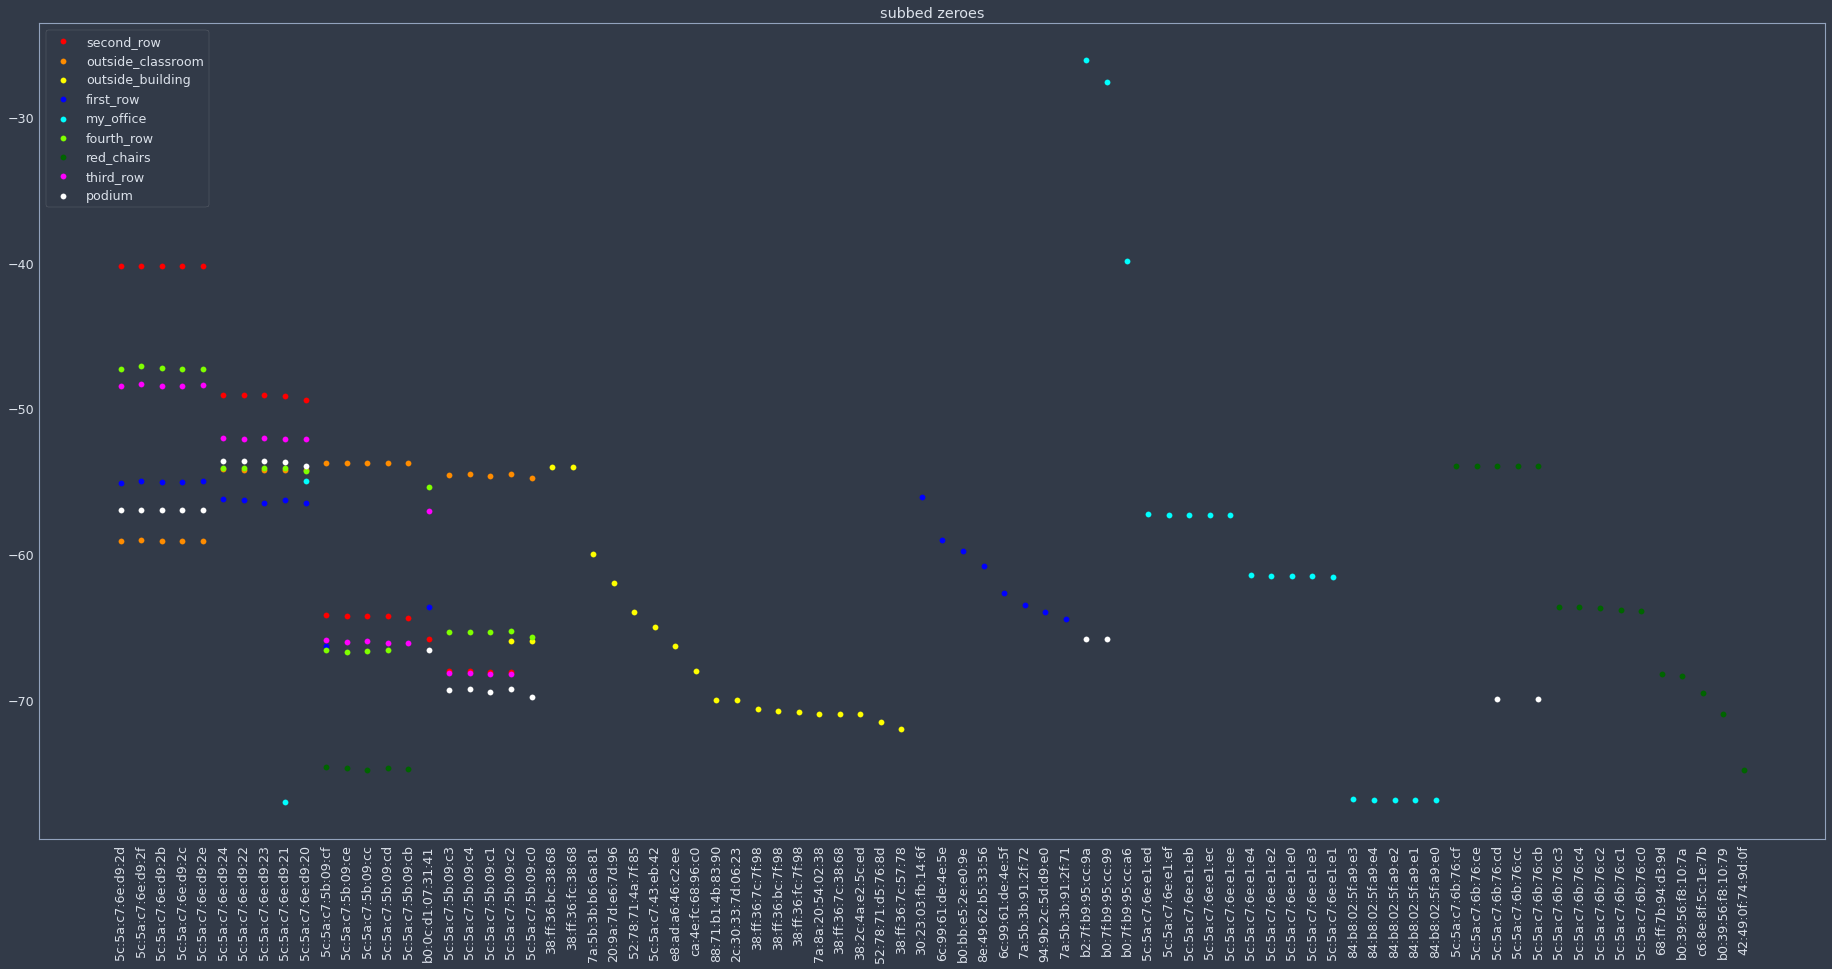

In [36]:
fig, ax = plt.subplots(figsize=(32,15)) # create the figure and axis objects,
# 32 pixels wide for every 15 pixels tall, change if necessary

colors = ["red", "darkorange", "yellow",   # list of colors to use when plotting scatters
          "blue", "cyan", "chartreuse",    # https://matplotlib.org/3.1.0/gallery/color/named_colors.html
          "darkgreen", "fuchsia", "white"] # change if necessary

for i in range(len(df_list_clean)): # iterate through final list of dataframes
    df = df_list_clean[i].head(20) # select i'th dataframe and take the top 20 results
    ax.scatter(df["mac_address"], # plot mac address on the x-axis
               df["average_rssi"], # plot average rssi on the y-axis
               c=colors[i], # select i'th color from the list
               marker="o", # https://matplotlib.org/3.3.3/api/markers_api.html
               label=file_names[i]) # provide a label for the legend from the file names list
    
ax.legend(loc="upper left") # position the legend
plt.xticks(rotation=90) # rotate the x-axis labels to be readable
ax.grid(False) # remove the grid lines
ax.set_title("subbed zeroes", loc="center") # set the title and its position

plt.show() # display the plot